## Основные задачи
# Анализ текстовых данных

### Какие задачи можно решать, обрабатывая текст?

1. синтаксические задачи
  * разметка по частям речи и по морфологическим признакам
  * деление слов в тексте на морфемы (суффикс, приставка и пр.)
  * стемминг, лемматизация
  * деление на предложения (инициалы и сокращения) и слова (китайский язык)
  * поиск имен и названий в тексте - сущностей (named entity recognition)
  * разрешение смысла слов в заданном контексте (замок/замок)
  * построить синтаксическое дерево
  * определение того, к каким другим объектам относится слово
2. задачи на понимание текста, в которых есть "учитель"
  * предсказание следующего символа
  * информационный поиск
  * анализ тональности
  * выделение отношений и фактов
  * ответы на вопросы
3. понимание и генерация текста
  * порождение текста
  * машинный перевод
  * диалоговые модели (чат-бот)

Косвенные задачи:
  * описание изображения
  * распознавание речи

**Задачи бизнеса**:
  * распознавание речи (помощник)
  * чат-бот (замена техподдержки в решении большинства вопросов)
  * поиск точного ответа на вопрос в базе документов (например, база стандартов)
  * оценка мнения в социальных сетях о продукте
  * ... (ваши варианты?)

## Основные техники 
* Уровень символов:
    * Токенизация: разбиение текста на слова
    * Разбиение текста на предложения
* Уровень слов – морфология:
    * Разметка частей речи
    * Снятие морфологической неоднозначности
* Уровень предложений – синтаксис:
    * Выделенние именных или глагольных групп (chunking)
    * Выделенние семантических ролей
    * Деревья составляющих и зависимостей
* Уровень смысла – семантика и дискурс:
    * Разрешение кореферентных связей
    * Выделение синонимов
    * Анализ аргументативных связей

## Основные проблемы
* Неоднозначность
    * Лексическая неоднозначность: *орган, парить, рожки, атлас*
    * Морфологическая неоднозначность: *Хранение денег в банке. Что делают белки в клетке?*
    * Синтаксическая неоднозначность: *Мужу изменять нельзя. Его удивил простой солдат.*
* Неологизмы: *печеньки, заинстаграммить, репостнуть, расшарить, затащить, килорубли*
* Разные варианты написания: *Беларусь,  Белоруссия -____- , РБ*
* Нестандартное написание: *каг дила?*

## План на сегодня
1. Как разбить текст на слова? 
2. Как посчитать количество слов?
3. Все ли слова нужны? Удаление стоп-слов.
4. Как определить часть речи слова. 

Инструменты: nltk, pymorphy2, pymystem3, spacy
----

```
pip install nltk, pymorphy2, pymysystem3, spacy
```


# Часть 1 Лекции:
-----

# Токенизация и подсчет количества слов


## Сколько слов в этом предложении?
Возьмем довольно популярную скороговорку, попытайтесь посчитать количество слов, токенов, лемм и лексем в предложении:

* На дворе трава, на траве дрова, не руби дрова на траве двора.*

**12 токенов** : На, дворе, трава, на, траве, дрова, не, руби, дрова, на, траве, двора

**8 - 9 типов** : Н/на, дворе, трава, траве, дрова, не, руби, двора.

**6  лексем** : на, не, двор, трава, дрова, рубить


### Токен и тип

**Тип**  – уникальное слово из текста

**Токен**  – тип и его позиция в тексте




### Обозначения 
$N$ = число токенов

$V$ – словарь (все типы)

$|V|$ = количество типов в словаре

**Как связаны $N$ и $|V|$?**


### Закон Ципфа


В любом достаточно большом тексте ранг типа обратно пропорционален его частоте: $f = \frac{a}{r}$

$f$ – частота типа, $r$  – ранг типа, $a$  – параметр, для славянских языков – около 0.07


### Закон Хипса

С увеличением длины текста (количества токенов), количество типов увеличивается в соответствии с законом: $|V| = K*N^b$


$N$  –  число токенов, $|V|$  – количество типов в словаре, $K, b$  –  параметры, обычно $K \in [10,100], b \in [0.4, 0.6]$

# От текста к простым моделям

## Разбиение на токены
**Def.**
разбиение последовательности символов на части (токены), возможно, исключая из рассмотрения некоторые символы
Наивный подход: разделить строку пробелами и выкинуть знаки препинания


*Трисия любила Нью-Йорк, поскольку любовь к Нью-Йорку могла положительно повлиять на ее карьеру.*


**Проблемы:**
* my.email@gmail.com, 127.0.0.1
* С++, C#, F#
* York University vs New York University, TensorFlow vs Tensor Flow
* Зависимость от языка (“Lebensversicherungsgesellschaftsangestellter”, “l’amour”)
Альтернатива: n-граммы

In [1]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|[^\w\s]+')
s = 'Extracting temporal and representation (so-called  fast-flowing) features efficiently plays a pivotal role in understanding visual sequence information.'

for t in tokenizer.tokenize(s)[:7]:
    print(t)

Extracting
temporal
and
representation
(
so
-


## ftfy: fixes text for you

Очень крутая библиотека, которая помогает с грязным текстом, который образовался в виду различных причин.

```
pip install ftfy
```


In [2]:
from ftfy import fix_text, fix_encoding
print(fix_text(u'\001\033[36;44mI&#x92;m blue, da ba dee da ba doo&#133;\033[0m', normalization='NFKC'))
print(fix_encoding("(à¸‡'âŒ£')à¸‡"))

I'm blue, da ba dee da ba doo...
(ง'⌣')ง


## Стоп-слова

Наиболее частые слова в языке, не содержащие никакой информации о содержании текста

In [3]:
from nltk.corpus import stopwords
print (' '.join(stopwords.words('russian')[:20]))
print (' '.join(stopwords.words('english')[:20]))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\marat/nltk_data'
    - 'D:\\WorkingDirectory\\venv\\nltk_data'
    - 'D:\\WorkingDirectory\\venv\\share\\nltk_data'
    - 'D:\\WorkingDirectory\\venv\\lib\\nltk_data'
    - 'C:\\Users\\marat\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


## Нормализация

Приведение токенов к единому виду для того, чтобы избавиться от поверхностной разницы в написании

Подходы
* сформулировать набор правил, по которым преобразуется токен
Нью-Йорк → нью-йорк → ньюйорк → ньюиорк
* явно хранить связи между токенами (WordNet – Princeton)
машина → автомобиль, Windows 6→ window

In [4]:
import re
s = 'New-York City'
s1 = s.lower()
print(s1)

new-york city


In [5]:
s2 = re.sub("\W", "", s1)
print(s2)

newyorkcity


## Стемминг и Лемматизация

Приведение грамматических форм слова и однокоренных слов к единой основе (lemma):

* Stemming – с помощью простых эвристических правил
  * Porter (Cambridge – 1980)
        5 этапов, на каждом применяется набор правил, таких как
            sses → ss (caresses → caress)
            ies → i (ponies → poni)

  * Lovins (1968)
  * Paice (1990)
  * другие
* Lemmatization – с использованием словарей и морфологического анализа


## Стемминг

In [6]:
from nltk.stem.snowball import PorterStemmer
s = PorterStemmer()
print (s.stem('Tokenization'))
print (s.stem('stemming'))

token
stem


In [7]:
from nltk.stem.snowball import RussianStemmer
r = RussianStemmer()
print(r.stem('Авиационный'))
print(r.stem('Препятствующий'))

авиацион
препятств


## Лемматизация
(обычно лучше работает для сложных языков, в том числе для русского)

In [8]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
for i in morph.parse(u'замок'):
    print("Metadata: {}".format(i))
    print("Word: {} | Normal form: {}".format(i.word, i.normal_form))
    print('\n')

Metadata: Parse(word='замок', tag=OpencorporaTag('NOUN,inan,masc sing,nomn'), normal_form='замок', score=0.428571, methods_stack=((DictionaryAnalyzer(), 'замок', 141, 0),))
Word: замок | Normal form: замок


Metadata: Parse(word='замок', tag=OpencorporaTag('NOUN,inan,masc sing,accs'), normal_form='замок', score=0.428571, methods_stack=((DictionaryAnalyzer(), 'замок', 141, 3),))
Word: замок | Normal form: замок


Metadata: Parse(word='замок', tag=OpencorporaTag('VERB,perf,intr masc,sing,past,indc'), normal_form='замокнуть', score=0.142857, methods_stack=((DictionaryAnalyzer(), 'замок', 764, 1),))
Word: замок | Normal form: замокнуть


In [9]:
import spacy
# В консоли python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

my_text = "Besides the proposed Overlap Coherence Training Scheme aims at reducing the training cost of deep RNN."
doc = nlp(my_text)
" ".join([token.lemma_ for token in doc])

'besides the propose Overlap Coherence Training Scheme aim at reduce the training cost of deep RNN .'

## Представление документов

![NLP PROCESS PIPELINE](../src/imgs/nlp_process.png)

**Boolean Model.** Присутствие или отсутствие слова в документе
**Bag of Words.** Порядок токенов не важен

*Погода была ужасная, принцесса была прекрасная.
Или все было наоборот?*

Координаты
* Мультиномиальные: количество токенов в документе
* Числовые: взвешенное количество токенов в документе

In [10]:
from sklearn.feature_extraction import DictVectorizer
dvectorizer = DictVectorizer(sparse=False)
text_dict = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = dvectorizer.fit_transform(text_dict)
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [11]:
dvectorizer.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [12]:
dvectorizer.transform({'foo': 4, 'unseen_feature': 3})

array([[0., 0., 4.]])

In [ ]:
from collections import Counter
import nltk
nltk.download('stopwords');

docs = [
    "Thank 40 you, Mr President.",
    "Madam President, I agree and recognise Turkey's European prospects, but if these prospects are to have an auspicious outcome, Turkey needs to:",
    "Madam President, firstly, I would like to express my sincerest thanks to the High Representative for including this important issue in the agenda at such an early stage.",
]

tokenizer = RegexpTokenizer('\w+|[^\w\s]+')
stopwords_eng = stopwords.words()

document_bags = list()

for d in docs:
    bag = Counter()
    text = d.lower()
    for t in tokenizer.tokenize(text):
        if t in stopwords_eng:
            continue
        bag[t] += 1
    document_bags.append(bag)

In [18]:
document_bags

[Counter({'40': 1, ',': 1, 'mr': 1, 'president': 1, '.': 1}),
 Counter({'madam': 1,
          'president': 1,
          ',': 3,
          'agree': 1,
          'recognise': 1,
          'turkey': 2,
          "'": 1,
          'european': 1,
          'prospects': 2,
          'auspicious': 1,
          'outcome': 1,
          ':': 1}),
 Counter({'madam': 1,
          'president': 1,
          ',': 2,
          'firstly': 1,
          'express': 1,
          'sincerest': 1,
          'high': 1,
          'representative': 1,
          'including': 1,
          'important': 1,
          'issue': 1,
          'agenda': 1,
          'early': 1,
          'stage': 1,
          '.': 1})]

In [19]:
dvectorizer.fit_transform(document_bags)

array([[0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 3., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 2., 1., 0., 0., 0., 2.],
       [0., 2., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 0., 0., 1., 1., 1., 0.]])

In [20]:
dvectorizer.feature_names_

["'",
 ',',
 '.',
 '40',
 ':',
 'agenda',
 'agree',
 'auspicious',
 'early',
 'european',
 'express',
 'firstly',
 'high',
 'important',
 'including',
 'issue',
 'madam',
 'mr',
 'outcome',
 'president',
 'prospects',
 'recognise',
 'representative',
 'sincerest',
 'stage',
 'turkey']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
sklearn_vectorizer = CountVectorizer(stop_words='english')
sklearn_vectorizer.fit_transform(docs).todense()

matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
         0, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0,
         0, 0, 0, 0, 2],
        [0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
         1, 1, 0, 1, 0]], dtype=int64)

In [22]:
sklearn_vectorizer.vocabulary_

{'thank': 23,
 '40': 0,
 'mr': 14,
 'president': 17,
 'madam': 13,
 'agree': 2,
 'recognise': 19,
 'turkey': 25,
 'european': 5,
 'prospects': 18,
 'auspicious': 3,
 'outcome': 16,
 'needs': 15,
 'firstly': 7,
 'like': 12,
 'express': 6,
 'sincerest': 21,
 'thanks': 24,
 'high': 8,
 'representative': 20,
 'including': 10,
 'important': 9,
 'issue': 11,
 'agenda': 1,
 'early': 4,
 'stage': 22}

## TF-IDF

Количество вхождений слова $t$ в документе $d$
$$
TF_{t,d} = term\!\!-\!\!frequency(t, d)
$$
Количество документов из $N$ возможных, где встречается $t$
$$
DF_t = document\!\!-\!\!fequency(t)
$$
$$
IDF_t = inverse\!\!-\!\!document\!\!-\!\!frequency(t) = \log \frac{N}{DF_t}
$$
TF-IDF
$$
TF\!\!-\!\!IDF_{t,d} = TF_{t,d} \times IDF_t
$$

Оценивает важность слова в контексте документа, являющегося частью корпуса
`

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(docs).todense()
features

matrix([[0.54645401, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.54645401,
         0.        , 0.        , 0.32274454, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.54645401, 0.        ,
         0.        ],
        [0.        , 0.        , 0.25882751, 0.25882751, 0.        ,
         0.25882751, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.19684499, 0.        ,
         0.25882751, 0.25882751, 0.1528677 , 0.51765502, 0.25882751,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.51765502],
        [0.        , 0.26795858, 0.        , 0.        , 0.26795858,
         0.        , 0.26795858, 0.26795858, 0.26795858, 0.26795858,
         0.26795858, 0.26795858, 0.26795858, 0.20378941, 0.        ,
         0.        , 0.        , 0.15826066, 0.        , 0.

In [24]:
vectorizer.vocabulary_

{'thank': 23,
 '40': 0,
 'mr': 14,
 'president': 17,
 'madam': 13,
 'agree': 2,
 'recognise': 19,
 'turkey': 25,
 'european': 5,
 'prospects': 18,
 'auspicious': 3,
 'outcome': 16,
 'needs': 15,
 'firstly': 7,
 'like': 12,
 'express': 6,
 'sincerest': 21,
 'thanks': 24,
 'high': 8,
 'representative': 20,
 'including': 10,
 'important': 9,
 'issue': 11,
 'agenda': 1,
 'early': 4,
 'stage': 22}

# Часть 2 Лекции:
-----

# Анализ  сообщений vk.com

In [25]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('../data/social_network_vk/vk_texts_with_sources.csv', usecols = ['text', 'source'])
df.text.dropna(inplace = True)
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


## Предварительный анализ коллекции

### Количество текстов из разных пабликов

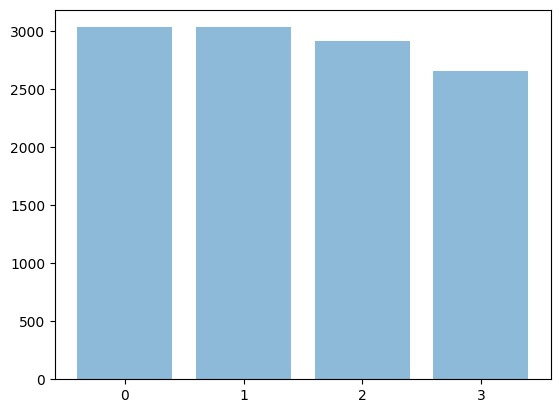

In [27]:
import matplotlib.pyplot as plt
import numpy as np

counts = df.source.value_counts()
values = counts.tolist()
labels = counts.index.tolist()

y_pos = np.arange(len(labels))

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, range(len(labels)))
plt.show()

## Токенизация

Используем регулярные выражения, чтобы разбить тексты на слова

In [28]:
import re
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""


df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

df.text.iloc[0]

'начальник главного оперативного управления генерального штаба вооруженных сил рф генерал полковник сергей рудской провел брифинг для сми по ситуации в сирии с начала этого года сирийскими правительственными войсками при поддержке вкс россии достигнуты значительные успехи по освобождению ключевых районов сирии от остатков террористических группировок это восточная часть провинции идлиб пригороды дамаска восточная гута восточный каламун ярмук северные районы провинции хомс которые в настоящее время находятся полностью под контролем правительственных войск в январе феврале в восточной части провинции идлиб была окружена и уничтожена крупная группировка джабхат ан нусра численностью более боевиков а также разрозненные бандгруппы игиловцев в результате под контроль правительственных войск перешла территория от кафер аккара до саббура с севера на юг и от синджара до эль хаммам с запада на восток площадью более четырех тысяч квадратных километров в настоящее время возобновлено движение по до

### Самые частые слова

In [29]:
from nltk import FreqDist

n_types = []
n_tokens = []
tokens = []
fd = FreqDist()

for index, row in df.iterrows():
    tokens = row['text'].split()
    fd.update(tokens)
    n_types.append(len(fd))
    n_tokens.append(sum(fd.values()))

for i in fd.most_common(10):
    print(i)

('в', 39552)
('и', 29656)
('на', 17274)
('по', 14798)
('с', 11919)
('россии', 9444)
('мвд', 6215)
('из', 4855)
('для', 4635)
('а', 4117)


### Закон Ципфа

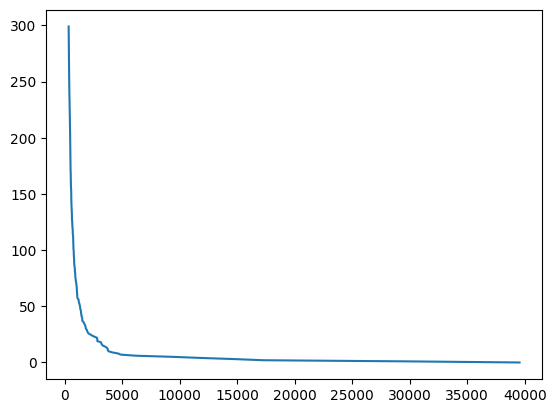

In [30]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### Закон Хипса

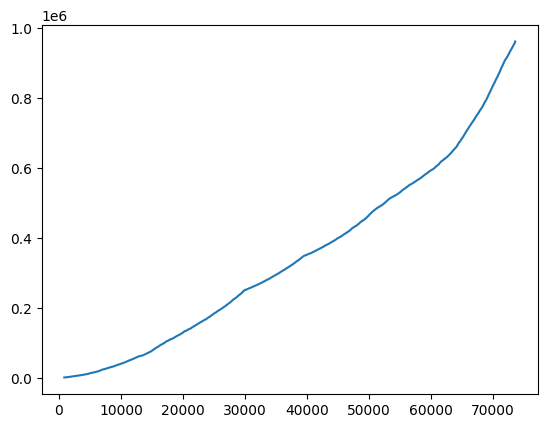

In [31]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()

##  Регулярные выражения подробнее


__*Классы символов:*__

__[A-Z]__ – символы верхнего регистра (латиница)

__[a-z]__ – символы нижнего регистра (латиница)

__[А-Я]__ – символы верхнего регистра (кириллица)

__[а-я]__ – символы нижнего регистра (кириллица)

__[0-9]__ или __\d__ – цифра

__[^0-9]__ или __\D__ – любой символ, кроме цифры

__.__ – любой символ



__*Служебные символы:*__

__\t__ – табуляция

__\s__ – любой пробельный символ

__\S__ – все символы, кроме пробельных

__\n__  – перенос строки

__^__ – начало строки

__$__ – конец строки

__\__ – экранирование

__*Операторы:*__

__?__ - предыдущий символ/группа может быть, а может не быть

__+__ - предыдущий символ/группа может повторяться 1 и более раз

__*__ - предыдущий символ/группа может повторяться 0 и более раз

__{n,m}__ - предыдущий символ/группа может повторяться от от n до m включительно

__{n,}__ - предыдущий символ/группа в скобках может повторяться n и более раз

__{,m}__ - предыдущий символ/группа может повторяться до m раз

__{n}__ - предыдущий символ/группа повторяется n раз

Внутри групп не работают операторы __.__, __+__, __*__, их необходимо экранировать с помощью обратного слеша: \



__*Методы:*__

__re.match(pattern, string)__ - найти подстроку pattern в начале строки string




__re.search(pattern, string)__ - аналогичен методу match, но ищет не только в начале строки (но возвращает только первое вхождение!)




In [32]:
m = re.search(r'издалека', 'рыбак рыбака видит издалека')

print(m)
print(m.group(0))
print(m.start(), m.end())

l = re.search(r'прорубь', 'рыбак рыбака видит издалека')
print(l)

<re.Match object; span=(19, 27), match='издалека'>
издалека
19 27
None


__re.findall(pattern, string)__ -  возвращает все вхождения pattern в string в виде списка

In [33]:
m = re.findall(r'рыбак', 'рыбак рыбака видит издалека')

print(m)

l = re.findall(r'прорубь', 'рыбак рыбака видит издалека')
print(l)

['рыбак', 'рыбак']
[]


__re.split(pattern, string, [maxsplit=0])__ - разделяет строку string по шаблону pattern; параметр maxsplit отвечает за максимальное количество разбиений (если их существует несколько).




In [34]:
m = re.split(r'видит', 'рыбак рыбака видит издалека')

print(m)

l = re.split(r'рыбак', 'рыбак рыбака видит издалека')
print(l, len(l))

l1 = re.split(r'рыбак', 'рыбак рыбака видит издалека',maxsplit=1)
print(l1, len(l1))

['рыбак рыбака ', ' издалека']
['', ' ', 'а видит издалека'] 3
['', ' рыбака видит издалека'] 2


__re.sub(pattern, string2, string1)__ - заменяет все вхождения pattern в string1 на srting2




In [35]:
m = re.sub(r'рыбак', 'Рыбак', 'рыбак рыбака видит издалека')

print(m)

Рыбак Рыбака видит издалека


__re.compile(pattern)__ - создает объект для последующего поиска

In [36]:
prog = re.compile(r'рыбак')

m = prog.findall('рыбак рыбака видит издалека')

print(m)

['рыбак', 'рыбак']


In [37]:
prog = re.compile('[А-Я]') # поиск всех заглавныех букв в строке

m = prog.findall('Рыбак рыбака видит издалека. Всегда!')

print(m)

['Р', 'В']


In [38]:
prog = re.compile('[0-9]{4}[авекорсту]{2}-[0-7]{1}') # регулярное выражение для поиска автомобильных
                                                          # номеров (русские буквы, совпадающие с латиницей)

s = '1234AB-7, 3244BC-3, 1099AE-4'
print(s)
res = prog.findall(s)

print(*res)

1234AB-7, 3244BC-3, 1099AE-4


In [39]:
# пример "жадных" операторов: ищем котов

s = 'кот котик компот'
res1 = re.findall(r'к.*т', s)
print(res1)

res2 = re.findall(r'к.*?т', s)
print(res2)

res3 = re.findall(r'к[\S]*?т', s)
print(res3)

res4 = re.findall(r'кот.*\s', s)
print(res4)

['кот котик компот']
['кот', 'кот', 'к компот']
['кот', 'кот', 'компот']
['кот котик ']


### Сегментация предложений

"?", "!" как правило однозначны. Проблемы возникают с ".".

Бинарный классификатор для сегментации предложений: для каждой точки "." определить, является ли она концом предложения или нет.


In [40]:
from nltk.tokenize import sent_tokenize

text = 'Первое предложение. Второе предложение! И, наконец, третье?'
sents = sent_tokenize(text)

print(len(sents))
print(*sents, sep='\n')

3
Первое предложение.
Второе предложение!
И, наконец, третье?


In [ ]:
import nltk
nltk.download('punkt')

## __Частотный анализ текста__

In [42]:
import nltk
d1 = nltk.FreqDist(tokens) # частотный словарь для текста
d1.most_common(10) # токен и кол-во его появлений в тексте

[]

### Задание 1

1. Посчитайте, сколько слов в тексте ./data/text_samples/task1.txt встречается больше одного раза.
2. Выведите топ-5 букв встречающихся чаще всего.

# Морфологический анализ

### Задачи морфологического анализа
* Разбор слова — определение нормальной формы  (леммы), основы (стема) и грамматических характеристик слова
* Синтез слова — генерация слова по заданным грамматическим характеристикам


### Морфологический процессор – инструмент морфологического анализа
* Морфологический словарь 
* Морфологический анализатор

### Лемматизация 
У каждого слова есть *лемма* (нормальная форма): 

* кошке, кошку, кошкам, кошкой $\implies$ кошка
* бежал, бежит, бегу $\implies$  бежать
* белому, белым, белыми $\implies$ белый

In [43]:
sent1 = 'Действительно, на его лице не отражалось никаких чувств – ни проблеска сочувствия не было на нем, а ведь боль просто невыносима'
sent2 = 'У страха глаза велики .'

In [44]:
from pymorphy2 import MorphAnalyzer # Для беларуского, украинского и русского языков

m = MorphAnalyzer()

lemmas1 = [m.parse(word)[0].normal_form for word in sent1.split()]
print(' '.join(lemmas1))

действительно, на он лицо не отражаться никакой чувство – ни проблеск сочувствие не быть на нем, а ведь боль просто невыносимый


In [45]:
from pymystem3 import Mystem # яндекс

m = Mystem()
lemmas2 = m.lemmatize(sent1)

print(''.join(lemmas2))

действительно, на его лицо не отражаться никакой чувство – ни проблеск сочувствие не быть на немой, а ведь боль просто невыносимый


### Стемминг
Слова состоят из морфем: $word = stem + affixes$. Стемминг позволяет отбросить аффиксы. Чаще всего используется алгоритм Портера.

* 1-ый вид ошибки: белый, белка, белье $\implies$  бел

* 2-ой вид ошибки: трудность, трудный $\implies$  трудност, труд 

* 3-ий вид ошибки: быстрый, быстрее $\implies$  быст, побыстрее $\implies$  побыст

Алгоритм Портера состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.


In [46]:
from nltk.stem.snowball import RussianStemmer

stemmer = RussianStemmer()
words = ['распределение', 'сделала', 'словообразование']

for w in words:
    stem = stemmer.stem(w)
    print(stem)

распределен
сдела
словообразован


### Разбор слова 

In [47]:
word1 = 'Словообразующий'

In [48]:
m = MorphAnalyzer()
m.parse(word1)

[Parse(word='словообразующий', tag=OpencorporaTag('ADJF masc,sing,nomn'), normal_form='словообразующий', score=0.5, methods_stack=((DictionaryAnalyzer(), 'словообразующий', 101, 0),)),
 Parse(word='словообразующий', tag=OpencorporaTag('ADJF inan,masc,sing,accs'), normal_form='словообразующий', score=0.5, methods_stack=((DictionaryAnalyzer(), 'словообразующий', 101, 4),))]

In [49]:
m = Mystem()
m.analyze(word1)

[{'analysis': [{'lex': 'словообразующий',
    'wt': 1,
    'gr': 'A,полн=(вин,ед,муж,неод|им,ед,муж)'}],
  'text': 'Словообразующий'},
 {'text': '\n'}]

### Задание 2

Найдите в списке персонажей романа "Война и мир"  (task2.txt) все уникальные  женские имена.
Используем либо Pystem либо pymorphy2. Для того, чтобы достать женское имя необходимо разобрать каждое слово из файла и проверить каждый разбор на 2 условия:
1. Что слово в женском роде
2. И что слово является именем (смотрим на тег)

## Первичная обработка текстов

### Удаление стоп-слов

In [50]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [51]:
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']

def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [52]:
m = Mystem()

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [53]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь']

def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

In [ ]:
df.text = df.text.apply(remove_stopwords) 
df.text = df.text.apply(lemmatize)
df.text = df.text.apply(remove_stoplemmas) 

In [ ]:
lemmata = []

for index, row in df.iterrows():
    lemmata += row['text'].split()

fd = FreqDist(lemmata)

for i in fd.most_common(10):
    print(i)

# Синтаксический анализ


## Грамматика зависимостей

Я купил кофе в большом магазине

![дерево зависимостей](https://habrastorage.org/getpro/geektimes/post_images/67a/b10/baf/67ab10baf90e8f9e321c2e29998e5de8.png)

* Все слова в предложении связаны отношением типа "master-slave", имеющим различные подтипы
* Узел дерева – слово в предложении
* Дуга дерева – отношение подчинения


[Универсальные зависимости](http://universaldependencies.org/)


### SyntaxNet 

[SyntaxNet](https://github.com/tensorflow/models/tree/master/research/syntaxnet) – архитектура синтаксического парсера. Доступны обученные модели для более чем 40 языков, в том числе, для русского.


D. Chen and C. D. Manning. A Fast and Accurate Dependency Parser using Neural Networks. EMNLP. 2014.

### CASE-Study

У вас в папке с data есть файл ./data/tmdb/tmdb_5000_movies.csv

Цель задачи - используя весь изученный материал, давайте попробуем реализовать на основе описания контента, рекомендательный механизм, который будет искать похожий котнент с исходным и предлагать его на выдачу.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Загрузите датасет и посмотрите что внутри


В датасете некоторые признаки представленны в виде json данных (аналог словаря в списке). Для целей рекомендации мы будем использовать два признака **genres** и **keywords** которые таже представленны в виде json.

In [ ]:
x = df.iloc[0]
x.T

In [ ]:
x['genres']

In [ ]:
x['keywords']

Как читать json-подобные объекты - при помощи родного модуля (стандартная библиотека Python которую вы должны знать наизусть :) ) который так и называется json. Предназначен для парсинга данного типа данных. Как можно прочитать и сохранить Json-подобный объект:

In [ ]:
j = json.loads(x['genres'])
j

In [ ]:
# Как сделать строку из наших жанров:
' '.join(' '.join(jj['name'].split()) for jj in j)

#### Задание 1:

Напишите функцию:

**def genres_and_keywords_string(row)**

Которая на вход принимает одну строку из нашего датафрейма с метаданными фильмов, и на выходе отдает строку скрещенную с содержанием колоник genres и keywords.
Выше указан код подсказка.

In [ ]:
def genres_and_keywords(row):
    # сначало загружаем и читаем json объект из колонки row['genres'] в переменную genres Затем делает предобработку (названия соединяем в одну строку можете навесить дополнительный функционал по очистке но не обязательно)

    # Тоже самое делаем для row['keywords']

    # Возвращаем соединенную строку genres и keywords

In [ ]:
# создайте и обзовите новую колону в датафрейме и примените написанную вами функцию создав новый признак


In [ ]:
# Создайте экземпляр класса TfidfVectorizer с max_features=2000

# Создайте переменную x которая будет содержать закодированный текст из tf-idf из созданного вами признака

In [ ]:
# Реализуйте Mapping фильма и индекса movie2idx необходимый для того чтобы закодировать наш запрос (query). Можете выбрать любой подход
# movie title --> index in dataframe


In [ ]:
# Так как индексы в датасете совпадают с иднексами закодированного представления попробуйте сформировать query и посмотрите вернет ли вам idx что-либо
query = ...
query.toarray()

In [ ]:
# Создайте переменную scores и рассчитайте cosine_similarity() между query и x
scores = ...
scores = scores.flatten()
plt.plot(scores)

In [ ]:
# Так как нам необходимо получить наиболее похожие оценки между N векторами, можно вопсользоваться следующим подходом:
(-scores).argsort()

In [ ]:
plt.plot(scores[(-scores).argsort()])

In [ ]:
# Соответственно рекомендовать будем слеюущим образом:
recommended_idx = (-scores).argsort()[1:6]

In [ ]:
# По самым похожим фильмам (индексы которые вы поличили выше) получите их названия из df


#### Задание 2:

Напишите функцию:

**recommend(title)**
Которая будет по указанному названию забирать id индекса искать его в x и считать скоры. По скорам будет возвращать топ 5 фильмов для рекомендаций:

In [ ]:
def recommend(title):
    ...

Протестируйте полученное решение, выдает ли такой подход логически похожий контент (фильмы):

In [ ]:
print("Reccomendations for 'Spider-Man 3': ")
print(recommend('Spider-Man 3'))